# Data Preprocessing

## Import

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, ElasticNetCV
import help_function as hf
import functions as f

### Import data

In [2]:
data = pd.read_csv('data/data.csv')
#Drop IR2YSP
data =data.drop(['IR2YSP'],axis=1)

### Raw Data Print

In [3]:
data.head(50)

,DATE,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
0,2004-11-22,2422.10,1251.67,610.76,12.97,196.16,NaN,4.178435,3.18919,-0.11,0.53,48.64
1,2004-11-23,2425.34,1254.95,611.55,12.67,196.77,NaN,4.182256,3.18919,-0.10,0.66,48.94
2,2004-11-24,2437.26,1260.16,616.27,12.72,195.24,NaN,4.197622,3.18919,-0.11,0.49,49.44
3,2004-11-25,2449.94,1265.83,619.00,12.72,195.24,NaN,4.193688,3.18919,-0.10,0.49,49.44
4,2004-11-26,2449.84,1267.34,619.99,12.78,195.41,NaN,4.245909,3.18919,-0.11,0.58,49.44
5,2004-11-27,2449.84,1267.34,619.99,12.78,195.41,NaN,4.245909,3.18919,-0.11,0.58,49.44
6,2004-11-28,2449.84,1267.34,619.99,12.78,195.41,NaN,4.245909,3.18919,-0.11,0.58,49.44
7,2004-11-29,2449.33,1267.78,622.74,13.30,195.21,NaN,4.317933,3.18919,-0.10,0.53,49.76
8,2004-11-30,2438.16,1262.91,619.64,13.24,196.08,NaN,4.349242,3.52304,-0.12,0.69,49.13
9,2004-12-01,2464.84,1275.86,619.95,12.97,196.51,NaN,4.364943,3.52304,-0.14,0.53,45.49


In [4]:
data.describe()

,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
count,7306.000000,7306.000000,7306.000000,7306.000000,7306.000000,7267.000000,7306.000000,7306.000000,7306.000000,7306.000000,7306.00000
mean,5089.140606,2711.943434,1823.614479,19.062518,247.575475,2.952826,2.896075,2.592552,0.279395,0.637943,71.71774
std,2440.236414,1166.033982,1082.307335,8.761547,79.181515,1.952369,1.121112,1.939945,0.478706,0.125456,21.53874
min,1616.500000,968.380000,525.900000,9.140000,124.849990,-2.932043,0.506905,-2.097160,-0.610000,0.320000,-37.63000
25%,3126.910000,1676.100000,948.680000,13.230000,188.872523,2.709115,1.997551,1.473890,-0.030000,0.560000,54.56250
50%,4458.040000,2488.800000,1471.600000,16.590000,229.910020,3.126136,2.750730,2.232970,0.170000,0.620000,70.64000
75%,6360.522500,3827.617500,2525.857500,22.137500,288.840000,4.373277,3.834893,3.455500,0.470000,0.700000,87.95250
max,11988.160000,5322.590000,4791.280000,82.690000,622.420000,6.259851,5.292843,9.059750,3.840000,2.400000,145.29000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       7306 non-null   object 
 1   MSCI       7306 non-null   float64
 2   LOW_VOL    7306 non-null   float64
 3   MOM        7306 non-null   float64
 4   VIX        7306 non-null   float64
 5   CS         7306 non-null   float64
 6   GDP        7267 non-null   float64
 7   IR         7306 non-null   float64
 8   CPI        7306 non-null   float64
 9   Liquidity  7306 non-null   float64
 10  PUT/CALL   7306 non-null   float64
 11  Crude Oil  7306 non-null   float64
dtypes: float64(11), object(1)
memory usage: 685.1+ KB


## Weekly Transformation

In [6]:
# Change date in datetime format and set as the index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

#Weekly Transformation
start_date = data.index.min() + pd.DateOffset(days=6 - data.index.min().weekday())
data = data[data.index >= start_date]
data = data.resample('W').mean()

## Foward Filling

In [7]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Forward-fill missing values
data.ffill(inplace=True)
data.dropna(inplace=True)

In [8]:
data.head()

,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
DATE,,,,,,,,,,,
2005-01-02,2527.725714,1308.382857,632.965714,12.598571,189.612857,4.469259,4.259581,3.408406,0.002857,0.527143,42.932857
2005-01-09,2478.760000,1280.782857,614.842857,13.742857,185.600000,4.469259,4.263999,3.255560,-0.054286,0.702857,44.467143
2005-01-16,2472.598571,1279.990000,619.220000,12.730000,182.487143,4.469259,4.217984,3.255560,-0.018571,0.627143,47.222857
2005-01-23,2458.400000,1276.518571,618.765714,13.570000,180.500000,4.469259,4.163595,3.255560,-0.021429,0.668571,48.115714
2005-01-30,2454.470000,1273.620000,619.038571,13.587143,177.338571,4.469259,4.163753,3.255560,0.012857,0.600000,48.230000


## Feature Extraction

In this section the three format are extracted, the raw format, the return format and the log return format

### Raw Data

In [9]:
df = data

Visualisation

In [10]:
df.head(1000)

,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
DATE,,,,,,,,,,,
2005-01-02,2527.725714,1308.382857,632.965714,12.598571,189.612857,4.469259,4.259581,3.408406,0.002857,0.527143,42.932857
2005-01-09,2478.760000,1280.782857,614.842857,13.742857,185.600000,4.469259,4.263999,3.255560,-0.054286,0.702857,44.467143
2005-01-16,2472.598571,1279.990000,619.220000,12.730000,182.487143,4.469259,4.217984,3.255560,-0.018571,0.627143,47.222857
2005-01-23,2458.400000,1276.518571,618.765714,13.570000,180.500000,4.469259,4.163595,3.255560,-0.021429,0.668571,48.115714
2005-01-30,2454.470000,1273.620000,619.038571,13.587143,177.338571,4.469259,4.163753,3.255560,0.012857,0.600000,48.230000
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-28,10006.367143,4665.052857,3781.388571,13.158571,161.824279,2.719333,4.134276,3.352120,-0.028571,0.625714,76.577143
2024-02-04,10098.258571,4692.824286,3858.885714,13.812857,159.674284,2.719333,3.994009,3.165520,-0.038571,0.624286,74.444286
2024-02-11,10191.331429,4657.567143,3977.700000,13.020000,156.800004,2.719333,4.151313,3.090880,-0.040000,0.591429,75.241429


### Return

In [11]:
# Create a Return Matrix
df_ret = pd.DataFrame()
df_ret['LOW_VOL_return']  = data.iloc[:, 1].pct_change() # Return Low-Volatility
df_ret['MOM_return'] = data.iloc[:, 2].pct_change() # Return Momentum
df_ret['VIX_return'] = data.iloc[:, 3].pct_change() 
df_ret['CS_return'] = data.iloc[:, 4].pct_change() 
df_ret['IR_return'] = data.iloc[:, 6].pct_change()
df_ret['CPI_return'] = data.iloc[:, 7].pct_change()
df_ret['Liquidity_return'] = data.iloc[:, 8].pct_change()
df_ret['PUT/CALL_return'] = data.iloc[:, 9].pct_change()
df_ret['Crude_Oil_return'] = data.iloc[:, 10].pct_change() # Return Crude Oil
#df_ret['IR2YSP_return'] = data.iloc[:, 10].pct_change()

Visualisation

In [12]:
df_ret.head(1000)

,LOW_VOL_return,MOM_return,VIX_return,CS_return,IR_return,CPI_return,Liquidity_return,PUT/CALL_return,Crude_Oil_return
DATE,,,,,,,,,
2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-09,-0.021095,-0.028632,0.090827,-0.021163,0.001037,-0.044844,-20.000000,0.333333,0.035737
2005-01-16,-0.000619,0.007119,-0.073701,-0.016772,-0.010791,0.000000,-0.657895,-0.107724,0.061972
2005-01-23,-0.002712,-0.000734,0.065986,-0.010889,-0.012895,0.000000,0.153846,0.066059,0.018907
2005-01-30,-0.002271,0.000441,0.001263,-0.017515,0.000038,0.000000,-1.600000,-0.102564,0.002375
...,...,...,...,...,...,...,...,...,...
2024-01-28,0.006112,0.022623,-0.039620,-0.000970,0.011580,0.000000,-2.333333,-0.091286,0.047055
2024-02-04,0.005953,0.020494,0.049723,-0.013286,-0.033928,-0.055666,0.350000,-0.002283,-0.027852
2024-02-11,-0.007513,0.030790,-0.057400,-0.018001,0.039385,-0.023579,0.037037,-0.052632,0.010708


### Log Return

In [13]:
df_log = pd.DataFrame()
df_log['LOW_VOL_log_return'] = f.compute_log_return(data['LOW_VOL'])
df_log['MOM_log_return'] = f.compute_log_return(data['MOM'])
df_log['VIX_log_return'] = f.compute_log_return(data['VIX'])
df_log['CS_log_return'] = f.compute_log_return(data['CS'])
df_log['IR_log_return'] = f.compute_log_return(data['IR'])
df_log['CPI_log_return'] = f.compute_log_return(data['CPI'])
df_log['Liquidity_log_return'] = f.compute_log_return(data['Liquidity'])
df_log['PUT/CALL_log_return'] = f.compute_log_return(data['PUT/CALL'])
df_log['Crude_Oil_log_return'] = f.compute_log_return(data['Crude Oil'])
#df_log['IR2YSP_log_return'] = compute_log_return(data['IR2YSP'])

Visualisation

In [14]:
df_log.head(1000)

,LOW_VOL_log_return,MOM_log_return,VIX_log_return,CS_log_return,IR_log_return,CPI_log_return,Liquidity_log_return,PUT/CALL_log_return,Crude_Oil_log_return
DATE,,,,,,,,,
2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-09,-0.021320,-0.029050,0.086936,-0.021391,0.001037,-0.045880,NaN,0.287682,0.035113
2005-01-16,-0.000619,0.007094,-0.076558,-0.016914,-0.010850,0.000000,-1.072637,-0.113979,0.060127
2005-01-23,-0.002716,-0.000734,0.063900,-0.010949,-0.012979,0.000000,0.143101,0.063969,0.018731
2005-01-30,-0.002273,0.000441,0.001262,-0.017670,0.000038,0.000000,NaN,-0.108214,0.002372
...,...,...,...,...,...,...,...,...,...
2024-01-28,0.006094,0.022371,-0.040427,-0.000971,0.011513,0.000000,NaN,-0.095725,0.045982
2024-02-04,0.005935,0.020287,0.048526,-0.013375,-0.034517,-0.057276,0.300105,-0.002286,-0.028248
2024-02-11,-0.007541,0.030325,-0.059113,-0.018165,0.038629,-0.023861,0.036368,-0.054067,0.010651


## Outliers

In this part outliers are capped to avoid extreme value influence on the dataset

In [15]:
df = f.cap_outliers(df, 0.05)
df_ret = f.cap_outliers(df_ret, 0.05)
df_log = f.cap_outliers(df_log, 0.05)
df_ret['GDP_return'] = data.iloc[:, 5].pct_change() 
df_log['GDP_log_return'] = f.compute_log_return(data['GDP'])

In [16]:
df.describe()

,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,5063.131332,2710.907704,1808.351165,18.486810,241.304790,2.949367,2.901601,2.568060,0.243298,0.636826,71.671604
std,2295.784996,1135.238046,1027.620479,6.388901,58.276301,1.605262,1.060032,1.715641,0.337176,0.086875,19.745213
min,2478.650571,1306.418714,669.358714,11.068714,160.607429,-1.355782,1.251347,-0.036510,-0.224429,0.487143,40.630571
25%,3140.605714,1682.642857,951.645000,13.365000,187.973576,2.714224,1.995789,1.473890,-0.024286,0.577857,55.173571
50%,4481.221429,2510.234286,1476.820000,16.661429,228.797143,3.126136,2.743645,2.211800,0.174286,0.625714,70.897143
75%,6400.839286,3834.819286,2533.465000,22.207143,288.992851,4.261430,3.815979,3.423709,0.479286,0.691429,88.044286
max,9695.337143,4631.547143,3854.657000,33.801286,352.029000,4.611998,4.706609,6.908103,0.985143,0.821857,105.991714


## Standardisation

The standardisation allow to avoid overealiance to specific variables due to differences in scale

In [17]:
scaler = StandardScaler()

standardized_data_df = scaler.fit_transform(df)
standardized_data_ret = scaler.fit_transform(df_ret)
standardized_data_log = scaler.fit_transform(df_log)

# Back to a DataFrame
df = pd.DataFrame(standardized_data_df, index=df.index, columns=df.columns)
df_ret = pd.DataFrame(standardized_data_ret, index=df_ret.index, columns=df_ret.columns)
df_log = pd.DataFrame(standardized_data_log, index=df_log.index, columns=df_log.columns)

In [18]:
df.describe()

,MSCI,LOW_VOL,MOM,VIX,CS,GDP,IR,CPI,Liquidity,PUT/CALL,Crude Oil
count,1.039000e+03,1039.000000,1039.000000,1.039000e+03,1039.000000,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03
mean,-1.641292e-16,0.000000,0.000000,6.838717e-16,0.000000,-4.240005e-16,3.009036e-16,-1.641292e-16,-3.419359e-17,-1.641292e-16,-1.066840e-15
std,1.000482e+00,1.000482,1.000482,1.000482e+00,1.000482,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00,1.000482e+00
min,-1.126292e+00,-1.237772,-1.108912,-1.161650e+00,-1.385404,-2.683190e+00,-1.557545e+00,-1.518863e+00,-1.387856e+00,-1.723811e+00,-1.572836e+00
25%,-8.378186e-01,-0.906206,-0.834081,-8.020592e-01,-0.915585,-1.465531e-01,-8.549247e-01,-6.380690e-01,-7.939845e-01,-6.791108e-01,-8.359483e-01
50%,-2.535909e-01,-0.176853,-0.322776,-2.858490e-01,-0.214730,1.101712e-01,-1.490814e-01,-2.077544e-01,-2.047757e-01,-1.279696e-01,-3.924162e-02
75%,5.829606e-01,0.990500,0.705964,5.825922e-01,0.818704,8.177450e-01,8.630103e-01,4.989739e-01,7.002319e-01,6.288212e-01,8.295968e-01
max,2.018672e+00,1.692653,1.992264,2.398198e+00,1.900902,1.036237e+00,1.703606e+00,2.530909e+00,2.201231e+00,2.130887e+00,1.738985e+00


## Multicollinearity

Check the multicolinearities with VIF and Correlation Matrix

### Raw Data

VIF

In [19]:
vif_data_df = pd.DataFrame()
vif_df = df.drop(['LOW_VOL','MOM','MSCI'],axis=1)

vif_data_df['Feature'] = vif_df.columns
vif_data_df['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

print(vif_data_df)

     Feature       VIF
0        VIX  2.016185
1         CS  5.610309
2        GDP  1.362361
3         IR  1.763804
4        CPI  2.587417
5  Liquidity  3.195313
6   PUT/CALL  1.448963
7  Crude Oil  1.990456


Correltion Matrix

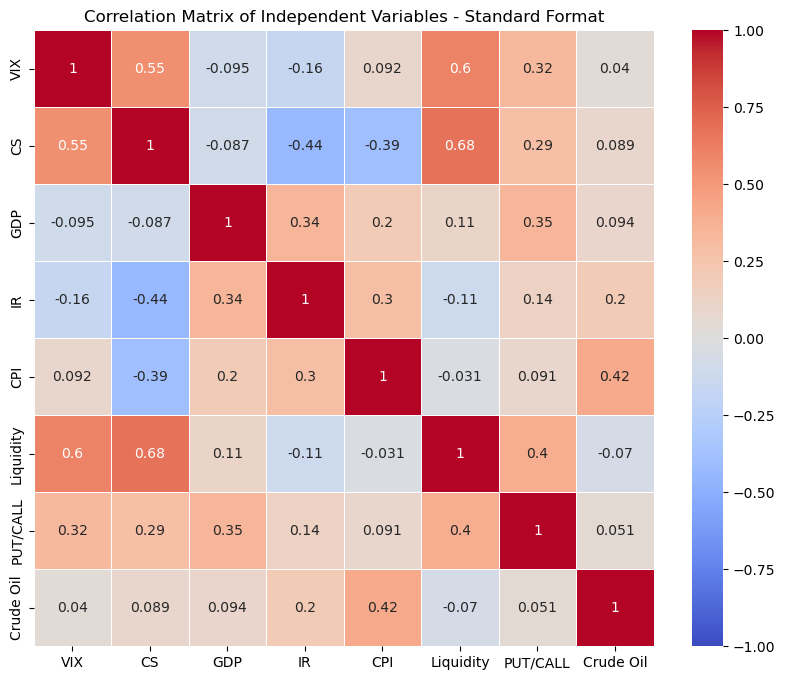

In [20]:
# Compute the correlation matrix
corr_matrix = vif_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables - Standard Format')

# Save the plot as an image
plt.savefig('images/corr_df.png', bbox_inches='tight')
plt.show()


### Return Data

VIF

In [21]:
df_ret = df_ret.dropna()
vif_data_ret = pd.DataFrame()
vif_ret = df_ret.drop(['LOW_VOL_return','MOM_return'],axis=1)

vif_data_ret['Feature'] = vif_ret.columns
vif_data_ret['VIF'] = [variance_inflation_factor(vif_ret.values, i) for i in range(vif_ret.shape[1])]

print(vif_data_ret)

            Feature       VIF
0        VIX_return  1.471739
1         CS_return  1.269590
2         IR_return  1.297904
3        CPI_return  1.010868
4  Liquidity_return  1.027544
5   PUT/CALL_return  1.371443
6  Crude_Oil_return  1.119869
7        GDP_return  1.008268


Correltion Matrix

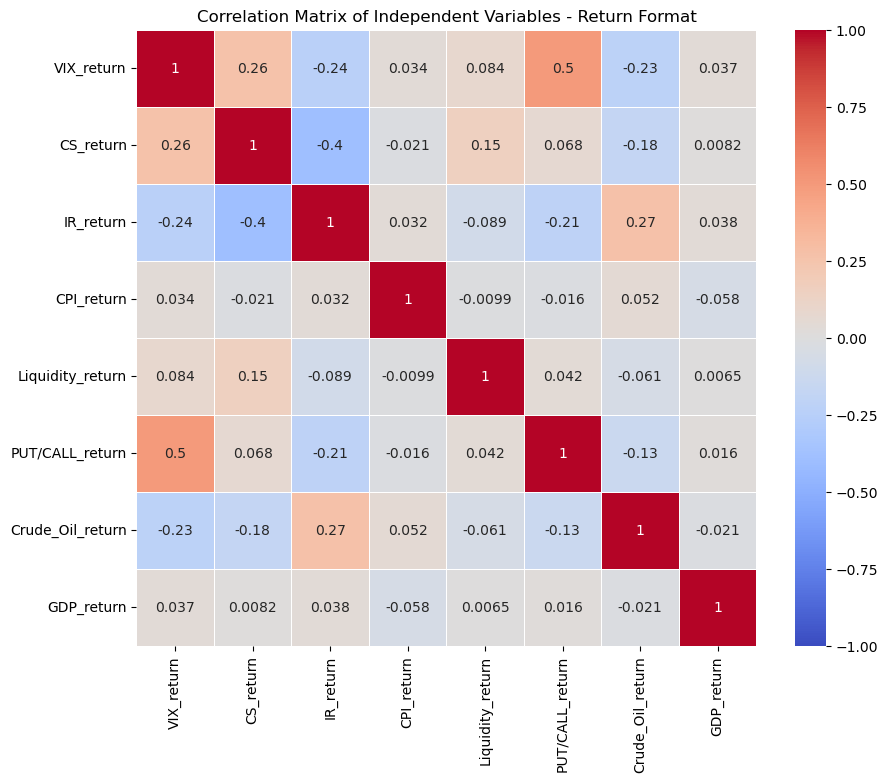

In [22]:
# Compute the correlation matrix
corr_matrix = vif_ret.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables - Return Format')

# Save the plot as an image
plt.savefig('images/corr_ret.png', bbox_inches='tight')
plt.show()

### Log Return Data

VIF

In [23]:
df_log = df_log.dropna()
vif_data_log = pd.DataFrame()
vif_log = df_log.drop(['LOW_VOL_log_return','MOM_log_return'],axis=1)

vif_data_log['Feature'] = vif_log.columns
vif_data_log['VIF'] = [variance_inflation_factor(vif_log.values, i) for i in range(vif_log.shape[1])]

print(vif_data_log)

                Feature       VIF
0        VIX_log_return  1.454284
1         CS_log_return  1.262945
2         IR_log_return  1.276473
3        CPI_log_return  1.009591
4  Liquidity_log_return  1.041171
5   PUT/CALL_log_return  1.364443
6  Crude_Oil_log_return  1.111830
7        GDP_log_return  1.007289


Correltion Matrix

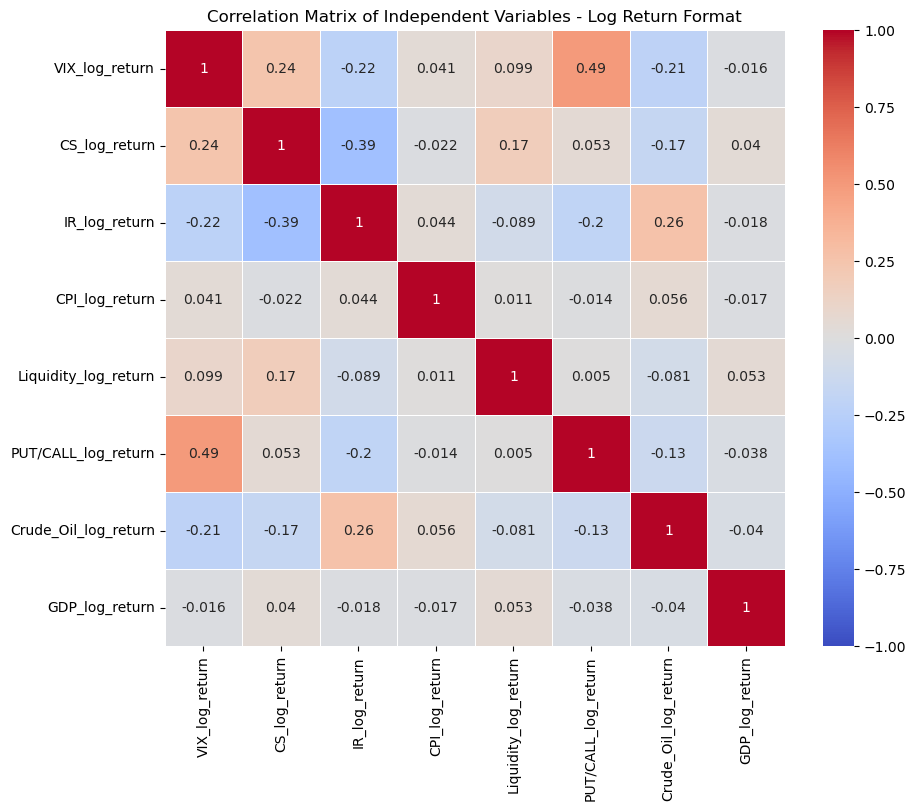

In [24]:
# Compute the correlation matrix
corr_matrix = vif_log.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables - Log Return Format')

# Save the plot as an image
plt.savefig('images/corr_logret.png', bbox_inches='tight')
plt.show()

## Create Y and X dataset

In [25]:
#Drop nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [26]:
df.index = pd.to_datetime(df.index)
df_ret.index = pd.to_datetime(df_ret.index)
df_log.index = pd.to_datetime(df_log.index)

df.sort_index(inplace=True)
df_ret.sort_index(inplace=True)
df_log.sort_index(inplace=True)
#Create one large matrix with all values
all_data_1 = pd.merge_asof(df, df_ret, left_index=True, right_index=True)
all_data = pd.merge_asof(all_data_1, df_log, left_index=True, right_index=True)

In [27]:
y_LOW = all_data['LOW_VOL_log_return']
y_MOM = all_data['MOM_log_return']
X = all_data.drop(['MSCI','LOW_VOL','MOM','LOW_VOL_return', 'MOM_return', 'LOW_VOL_log_return', 'MOM_log_return'], axis = 1)

X = pd.DataFrame(X)
y_LOW = pd.DataFrame(y_LOW)
y_MOM = pd.DataFrame(y_MOM)

### Save the dataset

In [28]:
X.to_csv('data/X.csv',index=True)
y_LOW.to_csv('data/y_LOW.csv',index=True)
y_MOM.to_csv('data/y_MOM.csv',index=True)
data.to_csv('data/data_weekly.csv', index = True)

### Multicolinearity X

In [29]:
vif_data_all = pd.DataFrame()
vif_all = X
vif_all.dropna(inplace=True)

vif_data_all['Feature'] = vif_all.columns
vif_data_all['VIF'] = [variance_inflation_factor(vif_all.values, i) for i in range(vif_all.shape[1])]
vif_data_all.to_csv('tables/vif_all.csv', index=False)
print(vif_data_all)

                 Feature        VIF
0                    VIX   2.183520
1                     CS   5.946883
2                    GDP   1.437068
3                     IR   1.845696
4                    CPI   2.733151
5              Liquidity   3.392467
6               PUT/CALL   2.225835
7              Crude Oil   2.080007
8             VIX_return  20.110692
9              CS_return  17.204815
10             IR_return  22.060837
11            CPI_return  11.864632
12      Liquidity_return   6.336899
13       PUT/CALL_return  14.193261
14      Crude_Oil_return  19.915026
15            GDP_return   2.121701
16        VIX_log_return  20.094614
17         CS_log_return  17.360608
18         IR_log_return  22.087683
19        CPI_log_return  11.808441
20  Liquidity_log_return   6.310756
21   PUT/CALL_log_return  13.854481
22  Crude_Oil_log_return  19.969089
23        GDP_log_return   1.927000


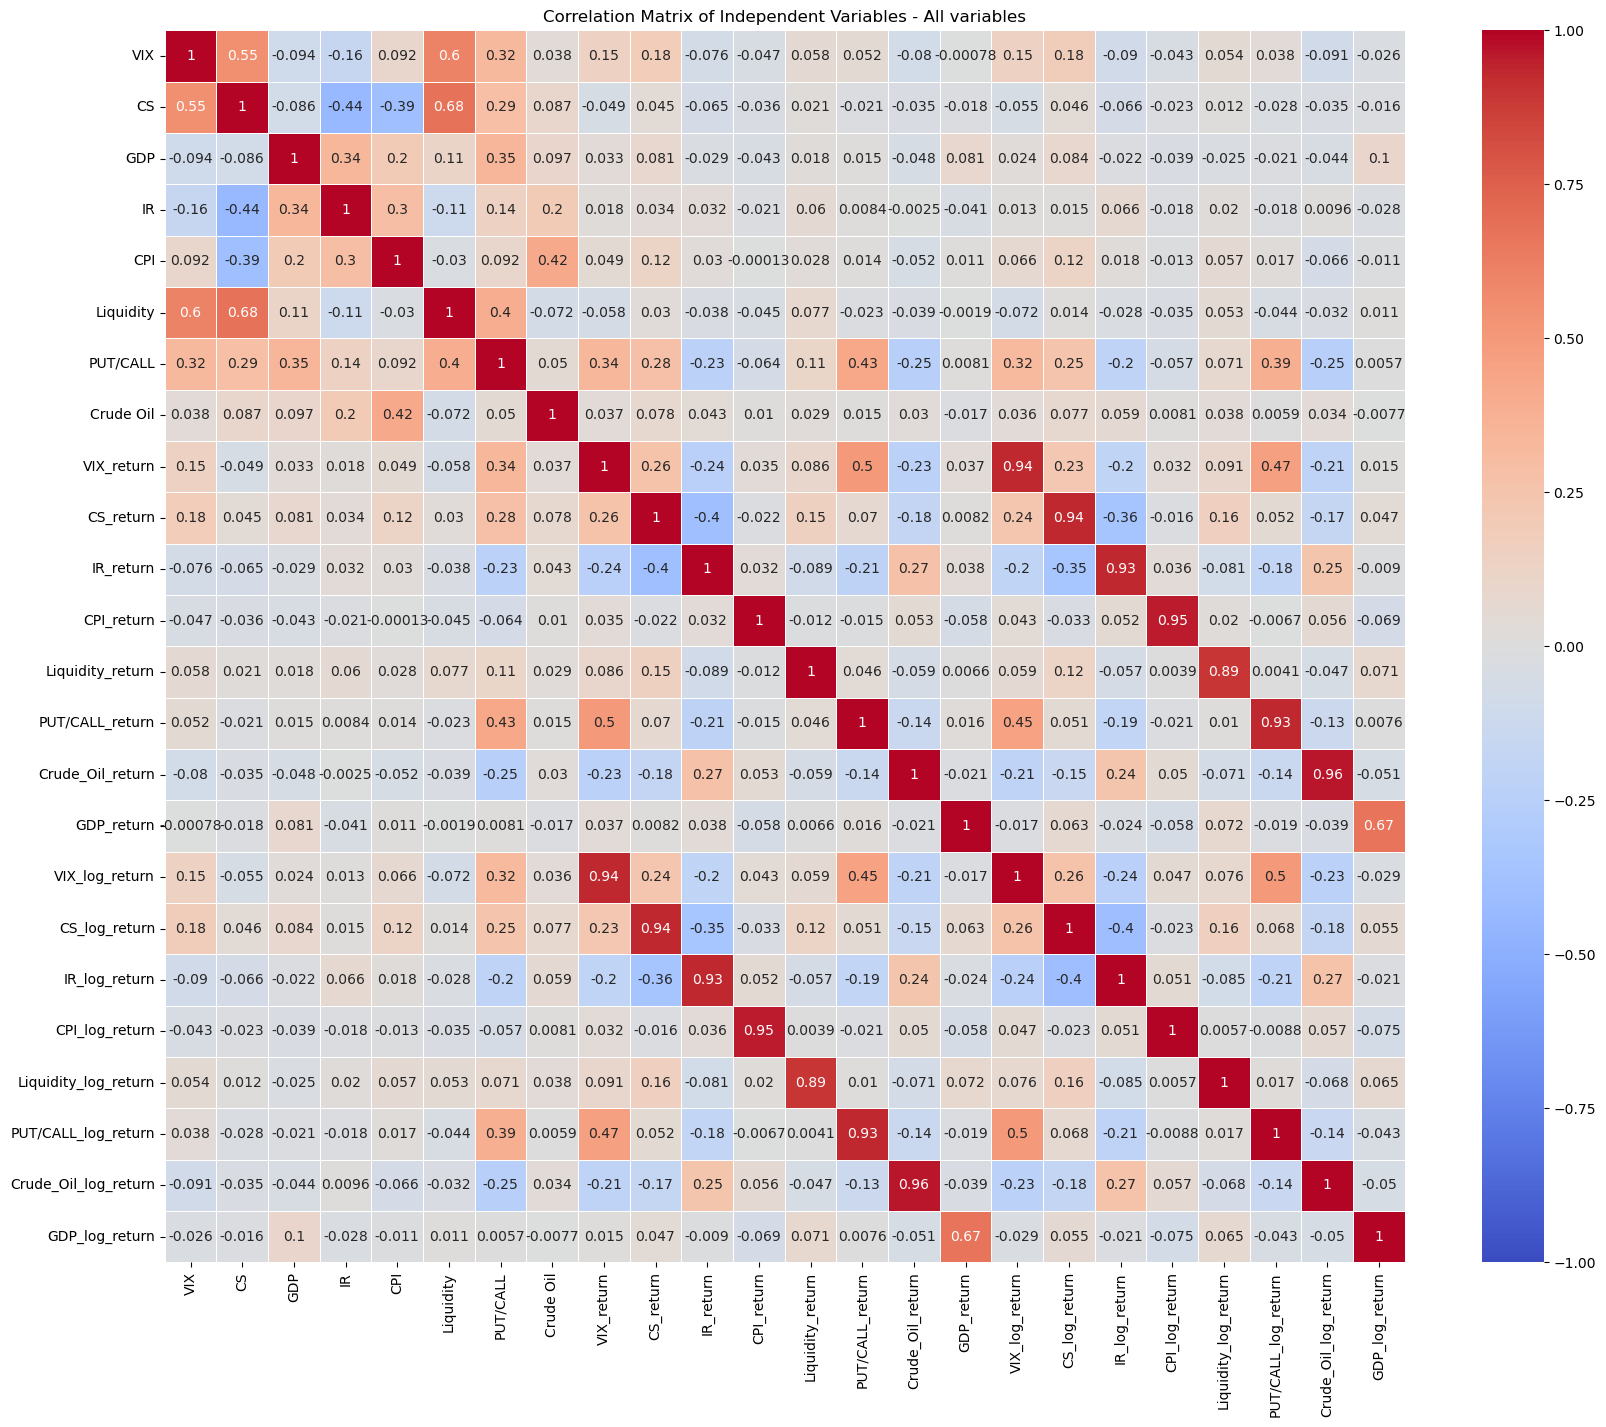

In [30]:
# Compute the correlation matrix
corr_matrix = vif_all.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables - All variables')

# Save the plot as an image
plt.savefig('images/corr_all.png', bbox_inches='tight')
plt.show()